Mean Squared Error: 4.2848560055886126e+23
R-squared: 0.9935516412058993


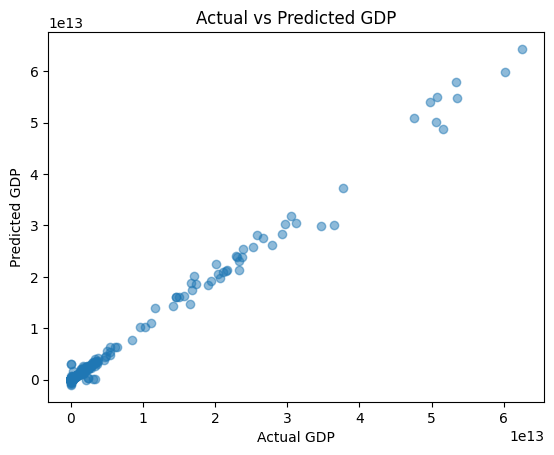

Predicted GDP for India in 2025: 3391922346513.745


c:\Users\yatha\Desktop\Real-GDP-Calculator\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\yatha\Desktop\Real-GDP-Calculator\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\yatha\Desktop\Real-GDP-Calculator\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\yatha\Desktop\Real-GDP-Calculator\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\yatha\Desktop\Real-GDP-Calculator\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with 

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor

def load_data():
    df = pd.read_csv("GDP.csv", usecols=["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014",
                                         "2015", "2016", "2017", "2018", "2019", "2021", "2022"])
    return df

df = load_data()

# Impute Missing Values
numeric_cols = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2021", "2022"]
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Transform Data into Long Format
df_long = pd.melt(df, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP')
df_long['Year'] = df_long['Year'].astype(int)

# Encode Country Name to Numerical Values
df_long['Country Code'] = df_long['Country Code'].astype('category').cat.codes

X = df_long[['Country Code', 'Year']]
y = df_long['GDP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('linear_reg', LinearRegression()),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boost', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    ('knn', KNeighborsRegressor())
]

stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train, y_train)

y_pred = stacked_model.predict(X_test)

r2 = stacked_model.score(X_test, y_test)

print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Actual vs Predicted GDP")
plt.show()

country_code_mapping = dict(zip(df['Country Name'], df['Country Code'].astype('category').cat.codes))

# Function to predict GDP based on user input
def predict_gdp(country_name, year):
    if country_name not in country_code_mapping:
        return f"Country '{country_name}' not found in the data."
    
    country_code = country_code_mapping[country_name]
    input_data = np.array([[country_code, year]])
    gdp_prediction = stacked_model.predict(input_data)
    return gdp_prediction[0]

country_name_input = 'India'
year_input = 2025

gdp_prediction = predict_gdp(country_name_input, year_input)
print(f"Predicted GDP for {country_name_input} in {year_input}: {gdp_prediction}")
